# K-MEANS

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 붓꽃 데이터로 군집화하기

### 붓꽃데이터 불러오기

In [2]:
# 아이리스 데이터 불러오기
iris = load_iris()
iris.keys()

# 데이터프레임화
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 군집화

In [3]:
# 군집개수는 3개, 군집 초기 중심점 위치 지정, 최대 반복수는 300으로 지정(모두 default값임)하여 군집화
kmeans = KMeans(n_clusters = 3, 
                init = 'k-means++', 
                max_iter = 300, 
                random_state = 0)

# 방법1
kmeans.fit(iris_df)

# 방법2
kmeans.fit_transform(iris_df)

array([[3.41925061, 0.14135063, 5.0595416 ],
       [3.39857426, 0.44763825, 5.11494335],
       [3.56935666, 0.4171091 , 5.27935534],
       [3.42240962, 0.52533799, 5.15358977],
       [3.46726403, 0.18862662, 5.10433388],
       [3.14673162, 0.67703767, 4.68148797],
       [3.51650264, 0.4151867 , 5.21147652],
       [3.33654987, 0.06618157, 5.00252706],
       [3.57233779, 0.80745278, 5.32798107],
       [3.3583767 , 0.37627118, 5.06790865],
       [3.32449131, 0.4824728 , 4.89806763],
       [3.31126872, 0.25373214, 4.9966845 ],
       [3.46661272, 0.50077939, 5.19103612],
       [3.90578362, 0.91322505, 5.65173594],
       [3.646649  , 1.01409073, 5.10804455],
       [3.49427881, 1.20481534, 4.88564095],
       [3.495248  , 0.6542018 , 5.03090587],
       [3.38444981, 0.1441527 , 5.02342022],
       [3.11245944, 0.82436642, 4.61792995],
       [3.37738931, 0.38933276, 4.97213426],
       [3.07471224, 0.46344363, 4.6955761 ],
       [3.31506588, 0.3286031 , 4.9236821 ],
       [3.

#### 분류된 label 확인

In [4]:
# 분류된 label 출력
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


#### target 컬럼, 군집 label 컬럼 생성

In [5]:
iris_df['cluster'] = kmeans.labels_
iris_df['target'] = iris.target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


In [6]:
# groupby를 통해 cluster와 target 확인

iris_df.groupby(['cluster','target']).count()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster target                                                           
0       1                      48                48                 48   
        2                      14                14                 14   
1       0                      50                50                 50   
2       1                       2                 2                  2   
        2                      36                36                 36   

                petal width (cm)  
cluster target                    
0       1                     48  
        2                     14  
1       0                     50  
2       1                      2  
        2                     36

### 시각화
- 2차원 평면으로 시각화하기 위해 차원축소 실시

In [7]:
from sklearn.decomposition import PCA

# 2차원 축소해주는 pca객체 만들기
pca = PCA(n_components = 2)

# 차원 축소 실시
pac_transformed = pca.fit_transform(iris.data)

# 데이터프레임에 컬럼 추가
iris_df['pca1'] = pac_transformed[:,0]
iris_df['pca2'] = pac_transformed[:,1]

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,target,pca1,pca2
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755


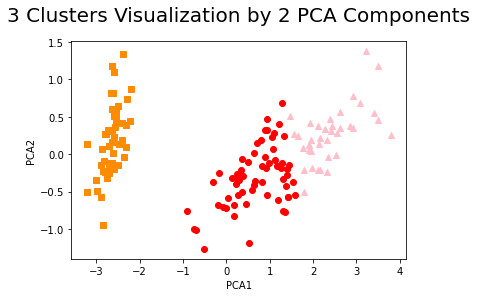

In [8]:
# 군집 label(cluster컬럼)값이 0,1,2인 경우 별도의 index 추출
marker0_idx = iris_df[iris_df['cluster'] == 0].index
marker1_idx = iris_df[iris_df['cluster'] == 1].index
marker2_idx = iris_df[iris_df['cluster'] == 2].index

# 각 군집에 해당하는 인덱스로 pca1,pca2 값 추출
plt.scatter(x = iris_df.loc[marker0_idx, 'pca1'], y = iris_df.loc[marker0_idx, 'pca2'], marker = 'o', color = 'red')
plt.scatter(x = iris_df.loc[marker1_idx, 'pca1'], y = iris_df.loc[marker1_idx, 'pca2'], marker = 's', color = 'darkorange')
plt.scatter(x = iris_df.loc[marker2_idx, 'pca1'], y = iris_df.loc[marker2_idx, 'pca2'], marker = '^', color = 'pink')

# 그래프 x축/y축 라벨 달기
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.title('3 Clusters Visualization by 2 PCA Components', fontsize = 20, pad = 20)
plt.show()

## 군집 평가

### 붓꽃 데이터로 데이터프레임 재생성

In [11]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'cluster', 'target', 'pca1', 'pca2'],
      dtype='object')

In [12]:
iris_df2 = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
                    'petal width (cm)', 'cluster']]
iris_df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 군집화

In [23]:
import warnings
warnings.filterwarnings('ignore')


kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0).fit(iris_df2)
iris_df2['cluster'] = kmeans.labels_
iris_df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,0.852955
1,4.9,3.0,1.4,0.2,0,0.815495
2,4.7,3.2,1.3,0.2,0,0.829315
3,4.6,3.1,1.5,0.2,0,0.805014
4,5.0,3.6,1.4,0.2,0,0.849302


### 실루엣계수 계산

#### 개별 실루엣 계수값 구하기

In [28]:
from sklearn.metrics import silhouette_samples, silhouette_score


# 모든 개별 데이터에 실루엣 계수값 구함
score_samples = silhouette_samples(iris.data, iris_df2['cluster'])
print(f'silhoueete_samples() return 값의 shape: {score_samples.shape}')

# 데이터프레임에 실루엣 계수 컬럼 추가
iris_df2['silhouette_coeff'] = score_samples

iris_df2.head()

silhoueete_samples() return 값의 shape: (150,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,0.852955
1,4.9,3.0,1.4,0.2,0,0.815495
2,4.7,3.2,1.3,0.2,0,0.829315
3,4.6,3.1,1.5,0.2,0,0.805014
4,5.0,3.6,1.4,0.2,0,0.849302


#### 실루엣계수 전체 평균 구하기

In [29]:
# 모든 데이터의 평균 실루엣 계수 값 구함
average_score = silhouette_score(iris.data, iris_df2['cluster'])
print(f'붓꽃 데이터 세트 Silhouette Analysis Score: {average_score:.3f}')

붓꽃 데이터 세트 Silhouette Analysis Score: 0.553


#### 클러스터별 실루엣계수 평균 구하기

In [27]:
# 클러스터별로 실루엣 계수 평균 구하기
iris_df2.groupby('cluster').mean().iloc[:,-1]

cluster
0    0.798140
1    0.417320
2    0.451105
Name: silhouette_coeff, dtype: float64

### 실루엣계수 시각화 사용자함수 생성

In [30]:
# 여러 개의 클러스터링 개수를 list로 입력받아 각각의 실루엣 계수를 면적으로 시각화하는 사용자 함수 생성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

        


In [43]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
    # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label) 
                
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

            axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
            axs[ind].legend(loc='upper right')
    
    plt.show()

#### 4개의 군집 중심의 500개 2차원 데이터 세트 생성

In [37]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 500,
                  n_features = 2,
                  centers = 4,
                  cluster_std = 1,
                  center_box = (-10.0, 10.0),
                  shuffle = True,
                  random_state = 1)


#### 사용자 함수 적용

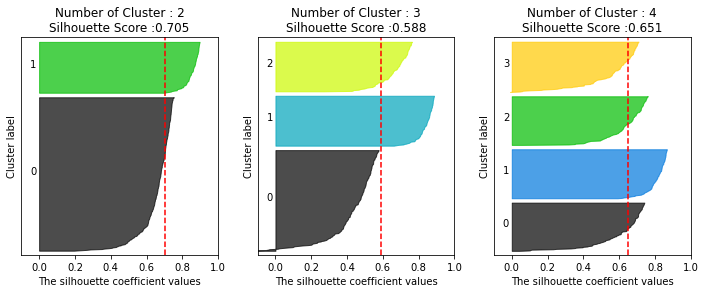

In [38]:
visualize_silhouette([2,3,4], X)

- 실루엣 스코어를 보면 군집을 2개로 했을 때, 가장 좋아 보이지만, 군집의 실루엣계수가 고르게 잘 표현된 것이 군집을 4개로 한 것임
- 따라서, 가장 군집화가 잘 된 cluster개수는 4개로 보임

#### 붓꽃 데이터를 이용해 K-MEANS 수행 시, 최적의 군집 개수를 실루엣 계수 시각화를 통해 구하기

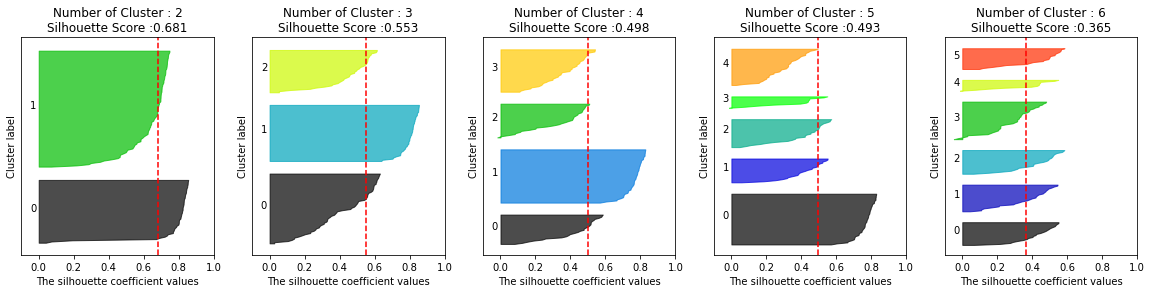

In [42]:
visualize_silhouette(list(range(2,7)), iris.data)

- 군집 개수를 2개로 하는 것이 가장 좋아 보임
- 3개의 경우 평균 실루엣 계수 값도 2개보다 작을 뿐더러, 군집 간 편차가 큼